##### Load and Setup

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Data-parallel add without any tasking
dp_add = pd.read_csv("basic-add-usm/timings.csv")
print(dp_add.head(6))

               Event  ExecTime(ms)  VectorSize                      Device
0    Total Exec Time      4.163310        1024  NVIDIA GeForce RTX 2080 Ti
1  Memory Setup Time      0.106181        1024  NVIDIA GeForce RTX 2080 Ti
2   Kernel Exec Time      0.475936        1024  NVIDIA GeForce RTX 2080 Ti
3    Total Exec Time      0.205917        2048  NVIDIA GeForce RTX 2080 Ti
4  Memory Setup Time      0.044724        2048  NVIDIA GeForce RTX 2080 Ti
5   Kernel Exec Time      0.140256        2048  NVIDIA GeForce RTX 2080 Ti


##### Data-parallel add (no tasking)

   VectorSize             Event                      Device      mean  \
0        1024  Kernel Exec Time       NVIDIA A100 80GB PCIe  0.612864   
1        1024  Kernel Exec Time  NVIDIA GeForce RTX 2080 Ti  0.511761   
2        1024   Total Exec Time       NVIDIA A100 80GB PCIe  3.446239   
3        1024   Total Exec Time  NVIDIA GeForce RTX 2080 Ti  3.175885   
4        2048  Kernel Exec Time       NVIDIA A100 80GB PCIe  0.188416   
5        2048  Kernel Exec Time  NVIDIA GeForce RTX 2080 Ti  0.140630   
6        2048   Total Exec Time       NVIDIA A100 80GB PCIe  0.271352   
7        2048   Total Exec Time  NVIDIA GeForce RTX 2080 Ti  0.212940   
8        4096  Kernel Exec Time       NVIDIA A100 80GB PCIe  0.277094   
9        4096  Kernel Exec Time  NVIDIA GeForce RTX 2080 Ti  0.188621   

        std  
0  0.099338  
1  0.029979  
2  3.953822  
3  0.323589  
4  0.025553  
5  0.015387  
6  0.033066  
7  0.033120  
8  0.041518  
9  0.005386  


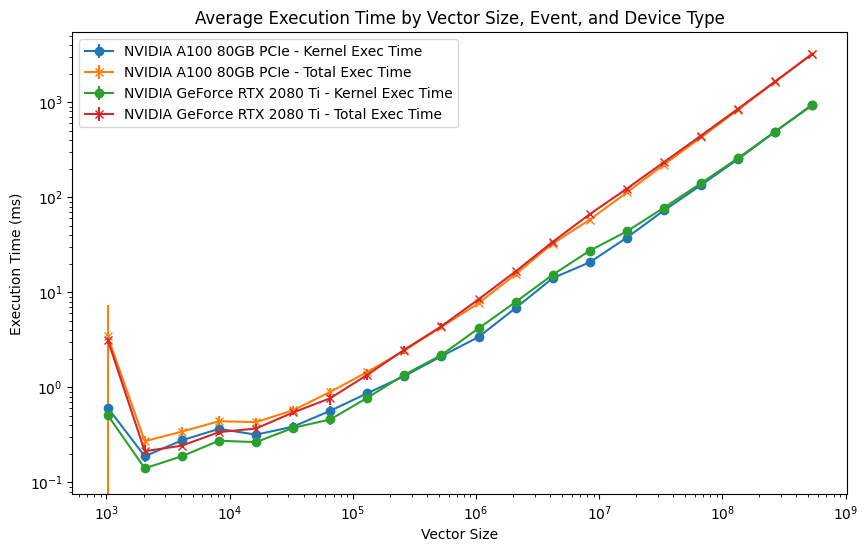

In [17]:
exec_events = dp_add[dp_add["Event"].isin(["Kernel Exec Time", "Total Exec Time"])]

grouped = exec_events.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()

for gpu in gpus:
    gpu_df = dp_add[(dp_add["Device"] == gpu)]
    

print(grouped.head(10))
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xscale("log")
ax.set_yscale("log")
# Iterate over each device type
for device in grouped['Device'].unique():
    device_data = grouped[grouped['Device'] == device]
    ax.errorbar(device_data[device_data['Event'] == 'Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Kernel Exec Time']['std'], 
                 label=f"{device} - Kernel Exec Time", fmt='-o')
    # Plotting error bars for 'Total Exec Time' event
    ax.errorbar(device_data[device_data['Event'] == 'Total Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Total Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Total Exec Time']['std'], 
                 label=f"{device} - Total Exec Time", fmt='-x')

# Set labels and title
ax.set_xlabel('Vector Size')
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Average Execution Time by Vector Size, Event, and Device Type')
ax.legend()

# Show plot
plt.show()



